# Analyze Google Career and Skills

In [8]:
# Make your plot output stored in the notebook.
%matplotlib inline

import pandas
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

dat = pandas.read_csv('google_jobs.csv')
dat.head(10)

,title,loc,minimum_qual,preferred_qual,resp
0,Front End Software Engineer,"Pittsburgh, PA, USA",BA/BS degree or equivalent practical experienc...,"4 years of relevant work experience, including...",Build next-generation web applications with a ...
1,"Software Engineer, HTML5 Video, Google Cloud P...","Sunnyvale, CA, USA",BS degree in Electrical Engineering or Compute...,MS degree in Electrical Engineering or Compute...,"Design, implement and launch complex HTML5 vid..."
2,"Front End Software Engineer, YouTube","San Bruno, CA, USA",BA/BS in Computer Science or related technical...,Experience with one or more general purpose pr...,"Design, implement and launch highly-visible, p..."
3,"Software Engineer, Google Home","Shanghai, China","Bachelor's degree in Computer Science, Electri...",Experience working with hardware designers/rea...,Develop the whole software stack for consumer ...
4,"Software Engineer, Front End Development",Singapore,"Bachelor's degree in a technical field, or equ...","Development experience in designing modular, o...",Build next-generation web applications with a ...
5,"Wireless Software Engineer, Google Home","Taipei, Taiwan",Master's degree in Electrical Engineering or C...,PhD degree.\nExperience with wireless protocol...,"Participate in architecting, developing, testi..."
6,"Network Engineer, Software and Automation","Sydney NSW, Australia",BA/BS in Computer Science or related field or ...,Master's degree or PhD in Computer Science or ...,Engage in and improve the lifecycle of service...
7,"Software Engineer, Cloud SQL","Sunnyvale, CA, USA","BS degree in Computer Science, similar technic...",10 years of relevant work experience in softwa...,Work alongside the Technical Lead to drive lon...
8,"Software Engineer, Infrastructure (English)","Tel Aviv-Yafo, Israel","Bachelor's degree in Computer Science, a relat...",Master’s degree.\nExperience with Unix/Linux o...,"Design, develop, test, deploy, maintain and im..."
9,Software Engineer,"Seoul, South Korea","Bachelor's degree in Computer Science, similar...","Master’s degree or PhD in Engineering, Compute...","Design, develop, test, deploy, maintain and im..."


## 1. Extracting Degree Requirement from Each Job

In [79]:
degree_reqs = {
    'BA': 0,
    'BS': 0,
    'Bachelor': 0,
    'MBA': 0,
    'Master': 0,
    'PhD': 0
}

keywords = ['BA', 'BS', 'Bachelor', 'MBA', 'Master', 'PhD']

for col in list(dat['minimum_qual']):
    lines = col.rstrip().split('\n')
    for line in lines:
        for keyword in keywords:
            if keyword in line:
                degree_reqs[keyword] += 1

# Sort the dict by value
degree_reqs = dict(sorted(degree_reqs.items(), key=lambda kv: kv[1]))

In [80]:
degree_dat = pandas.DataFrame.from_dict(degree_reqs, orient='index', columns=['Count'])
degree_dat = degree_dat.sort_values('Count')
degree_dat

,Count
MBA,20
Master,33
PhD,56
BA,429
BS,542
Bachelor,821


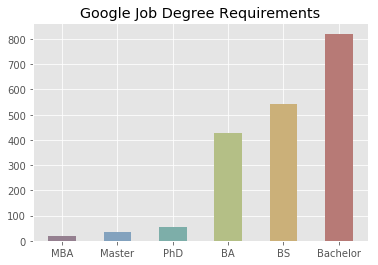

In [100]:
labels = list(degree_reqs.keys())
values = list(degree_reqs.values())
colors = ['#958090', '#83A2BE', '#7DAEA9', '#B4BF86', '#CBB079', '#B77A76']

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=colors, width=0.5)
plt.title('Google Job Degree Requirements')
plt.show()

## 2. Extracting Top Programming Languages from Each Job